# Asymptotic behavior of Rubik's Snake Shapes Count

Dmytro Fedoriaka, September 2024

This is an addition to the [main notebook](count-shapes.ipynb). 

Here I will study asymptotic behavior of the sequence $S_n$ (the number of n-wedge Rubik's Snake Shapes).


Here are precomputed first 28 terms of this sequence:

In [1]:
from rubiks_snake import RubiksSnakeCounter
S = RubiksSnakeCounter.S
print(",".join(map(str,S[1:29])))

1,4,16,64,241,920,3384,12585,46471,172226,633138,2333757,8561679,31462176,115247629,422677188,1546186675,5661378449,20689242550,75663420126,276279455583,1009416896015,3683274847187,13446591920995,49037278586475,178904588083788,652111697384508,2377810831870022


## 1. Obvious upper bound

Recall that by definition, $S_n$ is the number of strings from $\{0,1,2,3 \}^{n-1}$ that are valid formulas. There are $4^{n-1}$ strings in total, which gives upper bound: $S_n \le 4^{n-1}$.

## 2. Easy lower bound

At each step we can make 4 rotations, 2 of them increasing some coordinate, and 2 others decreasing some coordinate. If we only take rotations increasing some coordinate, we will never visit the same cube twice. This gives a lower bound $2^{n-1} \le S_n$.

## 3. Better upper bound

We can use the first terms of the sequence to refine the upper bound. 

If sequence of turns has any subsequence that is invalid (causes spatial conflict), then the whole sequence is also invalid. So, if we have a valid formula of length $ln$, and split it into $n$ strings of length $l$, all those strings must be valid formulas. So, $S_{ln+1} \le S_{l+1}^n$ and $S_{n} = O(S_{l+1}^{1/l})$.

In [2]:
for l in range(1,28):
  print("l=%d, exponent=%f" % (l, S[l+1]**(1/l)))  

l=1, exponent=4.000000
l=2, exponent=4.000000
l=3, exponent=4.000000
l=4, exponent=3.940073
l=5, exponent=3.915233
l=6, exponent=3.874703
l=7, exponent=3.852062
l=8, exponent=3.831755
l=9, exponent=3.817585
l=10, exponent=3.803206
l=11, exponent=3.792400
l=12, exponent=3.781928
l=13, exponent=3.773575
l=14, exponent=3.765571
l=15, exponent=3.758956
l=16, exponent=3.752571
l=17, exponent=3.747152
l=18, exponent=3.741941
l=19, exponent=3.737429
l=20, exponent=3.733081
l=21, exponent=3.729258
l=22, exponent=3.725568
l=23, exponent=3.722282
l=24, exponent=3.719106
l=25, exponent=3.716249
l=26, exponent=3.713484
l=27, exponent=3.710975


So, $S_n = O(3.711^n)$.

## 4. Better lower bound

We can generalize the bound above. Let's say we start with one wedge facing in +x direction and build snake in steps such that:
* At each step we add $l$ edges.
* After each step the last wedge's open is facing in positive axis direction (that is, +x, +y or +z).
* Let $(x_0, y_0,z_0)$ be coordinated of the last wedge before the step, $(x_1, y_1,z_1)$ - after the step, then:
  * $x_1 \ge x_0 $
  * $y_1 \ge y_0 $
  * $z_1 \ge z_0 $
  * $x_1 > x_0 $ or $y_1 > y_0 $ or $z_1 > z_0 $
  * For every wedge $(x,y,z)$ added during the step, $x \le x_1, y \le y_1, z \le z_1$
  * For every wedge $(x,y,z)$ added during the step, $x > x_0$ or $y > y_0$ or $z > z_0$
  * There are no spacial conflicts during the step.

If we follow this procedure, we will not get any spatial conflicts.

We can directly enumerate all possible ways to make a step of length $l$ - let's call this $a_l$. Then we can have a lower bound: $S_{ln+1} \ge a_l^n$ and asymptotic $S_n = \Omega({a_l^{n/l}})$.

Let's do this for $l$ from 1 to 10.

In [3]:
from rubiks_snake_slow import construct_formula, is_formula_valid, enumerate_valid_formulas_slow

def is_formula_good(formula):
  wedges = construct_formula(list(map(int,formula)))
  assert wedges[0].get_coord_relative_to_center() == (0,0,0)
  assert wedges[0].get_face_id_2() == 3
  if wedges[-1].get_face_id_2() not in [3,4,5]:
    return False
  dx,dy,dz = wedges[-1].get_coord_relative_to_center()  
  for wedge in wedges[1:]:
    x,y,z = wedge.get_coord_relative_to_center()
    if x>dx or y>dy or z>dz: return False
    if not(x>0 or y>0 or z>0): return False
  return dx>=0 and dy>=0 and dz>=0 and (dx+dy+dz)>0
    
for l in range(1, 11):  
  good_formulas = [f for f in enumerate_valid_formulas_slow(l+1) if is_formula_good(f)]
  fc = len(good_formulas)
  print("l=%d, a[%d]=%d, exponent=%f" % (l, l, fc, fc**(1/l)))  
  # Validation (very slow).
  if (l<=7):
    for f1 in good_formulas:
      for f2 in good_formulas:
        assert any(is_formula_valid(f1+rot+f2[1:]) for rot in "0123")


l=1, a[1]=2, exponent=2.000000
l=2, a[2]=4, exponent=2.000000
l=3, a[3]=8, exponent=2.000000
l=4, a[4]=24, exponent=2.213364
l=5, a[5]=72, exponent=2.352158
l=6, a[6]=220, exponent=2.456992
l=7, a[7]=672, exponent=2.534603
l=8, a[8]=2056, exponent=2.594943
l=9, a[9]=6392, exponent=2.647577
l=10, a[10]=20356, exponent=2.696927


For $l=10$, we get asymptotic $20356^n  \le S_{10n+1}$ and $S_n = \Omega(2.696^n)$

## 5. Conjectures towards asymptotic formula

Here I will try to obtain tighter bounds. I will analyze the data and make some conjectures and get some bounds based on them (each conjecture assumes previous conjectures are true and gets tighter bound).

Unfortunately at the moment none of these conjectures are proven.

Consider the sequence $r_n = \frac{S_{n+1}}{S_n}$. 

$r_n$ has the following meaning. Consider set of all (valid) shapes for the snake with $n$ wedges. Try adding next wedge to the tail. There are three options: 
* You can't do it (cube is fully occupied or partially occupied) - this means you have 0 options to extend the snake.
* You can do it, but only in unique way (cube is partially occupied) - this means you have 1 option to do extend the snake.
* The cube is empty. Then you have 4 different options to extend the snake.

$r_n$ is the *average* number to extend a random snake.

From easy bounds obtained before, we have $2^{n-1} \le r_n \le 4^{n-1}$.

Then, we can write the following:


$$
\log S_n = \sum_{i=1}^{n-1} \log{r_i}
$$

Let's print and plot first 25 values of the sequence $r_n$:

r[1]=	 4.000000
r[2]=	 4.000000
r[3]=	 4.000000
r[4]=	 3.765625
r[5]=	 3.817427
r[6]=	 3.678261
r[7]=	 3.718972
r[8]=	 3.692571
r[9]=	 3.706096
r[10]=	 3.676205
r[11]=	 3.686016
r[12]=	 3.668625
r[13]=	 3.674767
r[14]=	 3.663053
r[15]=	 3.667556
r[16]=	 3.658079
r[17]=	 3.661510
r[18]=	 3.654453
r[19]=	 3.657138
r[20]=	 3.651427
r[21]=	 3.653608
r[22]=	 3.648913
r[23]=	 3.650716
r[24]=	 3.646818
r[25]=	 3.648338
r[26]=	 3.645025
r[27]=	 3.646324


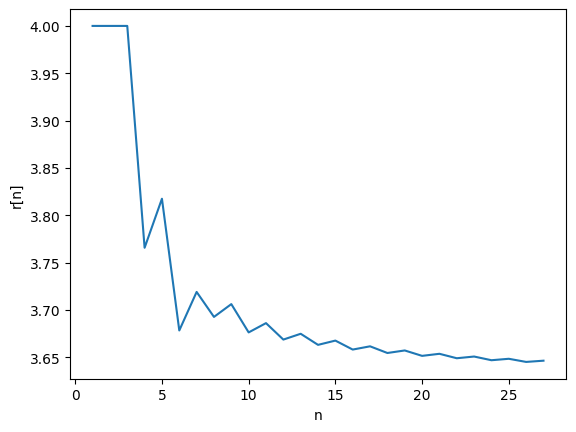

In [4]:
from matplotlib import pyplot as plt

r = [None] + [S[n+1]/S[n] for n in range(1,len(S)-1)]
for i in range(1,len(r)):
  print("r[%d]=\t %f" % (i, r[i]))
plt.plot(range(1,len(S)-1), r[1:])
plt.xlabel("n")
plt.ylabel("r[n]")
plt.show()

It seems that $r_n$ approaches some limit around 3.64, but I can't prove it.

Also, for data we have, subsequences $r_{2n}$ and $r_{2n+1}$ are monotonically decreasing (starting from $r_8$). If this is true for all $n$, we can get a very good lower bound.


### Conjecture 1: Sequences $r_{2n}$ and $r_{2n+1}$ are monotonically decreasing for $n>=4$.

**Proof sketch.** Consider random snake of length $n$, there are on average $x$ ways to add wedge on one side. Now extend it from the other side in all possible ways. This can only decrease $x$, because it will block some extensions that were possible before, but won't allow any new extension.

*Note.* This seems intuitive, and is consistent with computed values. However, this proof sketch implies that $r_{n}$ must be monotonically decreasing, and it's not. Snakes of odd and even lengths seem to behave differently. So, the proper proof must explain this non-monotonicity between odd and even $n$.


If Conjecture 1 is true, by monotone convergence theorem, these limits exist: 

$$\underset{n \to \infty}{\lim} r_{2n} = \alpha_0$$
$$\underset{n \to \infty}{\lim} r_{2n+1} = \alpha_1$$

Also, from the same theorem, we know that for any $n$, $r_{2n} \ge \alpha_0$ and $r_{2n+1} \ge \alpha_1$ 

This gives us the following lower bounds:

$$\alpha_0^n \alpha_1^n \le S_{2n+1}$$
$$\alpha_0^n \alpha_1^n \cdot \alpha_0 \le S_{2n+2}$$

Or, we can write: $S_{n} \in \Omega((\alpha_0 \alpha_1)^{n/2})$.

### Conjecture 2:  $\sum_{n=0}^{\infty} \log(\frac{r_{2n+1}r_{2n+2}}{\alpha_0 \alpha_1})  = A < \infty$

This means that the sequences $r_{2n}$ and $r_{2n+1}$ converge fast enough. In this case:

$$\alpha_0^n \alpha_1^n \le S_{2n+1} \le e^A \cdot \alpha_0^n \alpha_1^n$$
$$\alpha_0^n \alpha_1^n \cdot \alpha_0  \le S_{2n+2} \le 4 \cdot e^A \cdot \alpha_0^n \alpha_1^n$$

Or, we can write: $S_{n} \in \Theta((\alpha_0 \alpha_1)^{n/2})$.

We can also get asymptotic equivalence. This conjecture is equivalent to 
$ \underset{n \to \infty}{\lim} \frac{S_{2n+1}}{\alpha_0^n \alpha_1^n} = e^A$, from which we get 
$ \underset{n \to \infty}{\lim} \frac{S_{2n+1}}{e^A \alpha_0^n \alpha_1^n} = 1$, and, by definition of asymptotic equivalence

$$S_{2n+1} \sim e^A \alpha_0^n \alpha_1^n$$

$$S_{2n+2} \sim e^A \alpha_0^n \alpha_1^{n+1}$$


### Conjecture 3: $\alpha_0 = \alpha_1$

Then $S_n \sim e^A \alpha_0^{n-1}$.


### Estimating parameters
If all these conjectures are true, what are values of $e^A$ and $\alpha$? Let's get approximate values from the data. We see that $\alpha$ approaches limit somewhere around 3.64. Let's print values of $\frac{S_n}{3.64^{n-1}}$:

In [5]:
alpha=3.64
for i in range(2,27):
  print(i, S[i]/(alpha**(i-1)))

2 1.0989010989010988
3 1.2075836251660426
4 1.327014972709937
5 1.372813394673312
6 1.4397295188311603
7 1.4548628439215976
8 1.4864268252306676
9 1.507894471337637
10 1.5352752976545923
11 1.5505456021152393
12 1.5701473605252831
13 1.5824949659550214
14 1.5976099943724222
15 1.6077281955969716
16 1.6198994379827594
17 1.6279452235287346
18 1.6375654442928518
19 1.6440676556925098
20 1.6518084329504792
21 1.6569939341012143
22 1.6631886523588644
23 1.6672613668587524
24 1.6721698980651125
25 1.6753021761846612
26 1.6791399217407763


So, approximately, and conditioned on all the conjectures, $S_n \sim 1.7 \cdot 3.64^{n-1}$